In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
from empleados_package.visualizacion import mapa_calor, histograma, categoricos,  histo_porcentual, quesitos_porcentual

In [3]:
df_completo = pd.read_csv("./data/empleados_limpio.csv", index_col = 0)
df_felices = pd.read_csv("./data/empleados_felices.csv", index_col = 0)
df_tristes = pd.read_csv("./data/empleados_tristes.csv", index_col = 0)

# Visualización y análisis de los datos numéricos y categóricos
Si bien la visualización con las conclusiones del análisis se realizará en forma de dashboard en tableau, vamos a hacer una primera aproximación a los datos que nos ayude tanto a desarrollar el mencionado dashboard, como a plantearnos una posibles modificaciones si quisiéramos aplicar algoritmos de machine learning.

Primero veremos la correlación entre las columnas numéricas y luego compararemos las estadísticas de los trabajodores que abandonan con los que se quedan

## Correlación de datos
Antes de comparar los datos de los trabajadores que dejaron la empresa con los que continuan, vamos a analizar la correlación que hay entre ellos.

En el mapa de calor que podemos ver debajo de estas líneas se observan las siguientes relaciones entre los datos:

* La variable 'AGE' está relaciona con gran parte de los datos en los que el paso del tiempo tiene alguna influencia:

    * Como es lógico, tiene una correlación moderadamente alta con 'TOTAL_WORKING_YEARS' y moderada tanto con 'JOB_LEVEL' como con 'MONTHLY_INCOME'. Tiene sentido, ya que a menor edad es normal llevar menos tiempo trabajando, y la consecuencia es que se tendrá un menor nivel laboral con menos remuneración. Aunque esto ocurriría con alguien recién contratad de baja categoría, es más común entre los jóvenes, de hecho el 'MONTHLY_INCOME' tan sólo tiene una correlación moderada con 'YEARS_AT_THE_COMPANY'. 
    
    * En la misma línea, 'TOTAL_WORKING_YEARS' está muy relacionado tanto con 'JOB_LEVEL' como con 'MONTHLY_INCOME', más de lo que lo estaba el total de años trabajados.
    
* El 'ENVIRONMENT_SATISFACTION' tiene una relación moderada, pero que hay que tener en cuenta, con 'DISTANCE_FROM_HOME'.

* El 'MONTHLY_INCOME' tiene una correlación positiva práticamente perfecta con 'JOB_LEVEL'. Tiene bastante sentido que el sueldo suba con la categoría laboral. Además, 'JOB_LEVEL'tiene una correlación moderada con 'YEARS_AT_COMPANY', de lo cuál se entiende que hay algún tipo de promoción interna.

* 'PERFORMANCE_RATING' tiene un correlación positiva muy fuerte con 'PERCENT_SALARY_HIKE'. Parece que la valoración de desenpeño es el factor principal para las subidas salariales.

* También hay que destacar que 'YEARS_AT_COMPANY' tiene una relación muy importante con 'YEARS_WITH_CURR_MANAGER' y con 'YEARS_SINCE_LAST_PROMOTION', de lo cual se entiende que hay poca rotabilidad y que la carrera laboral se estanca después de algunos años.

Saving figure heatmap_limpio


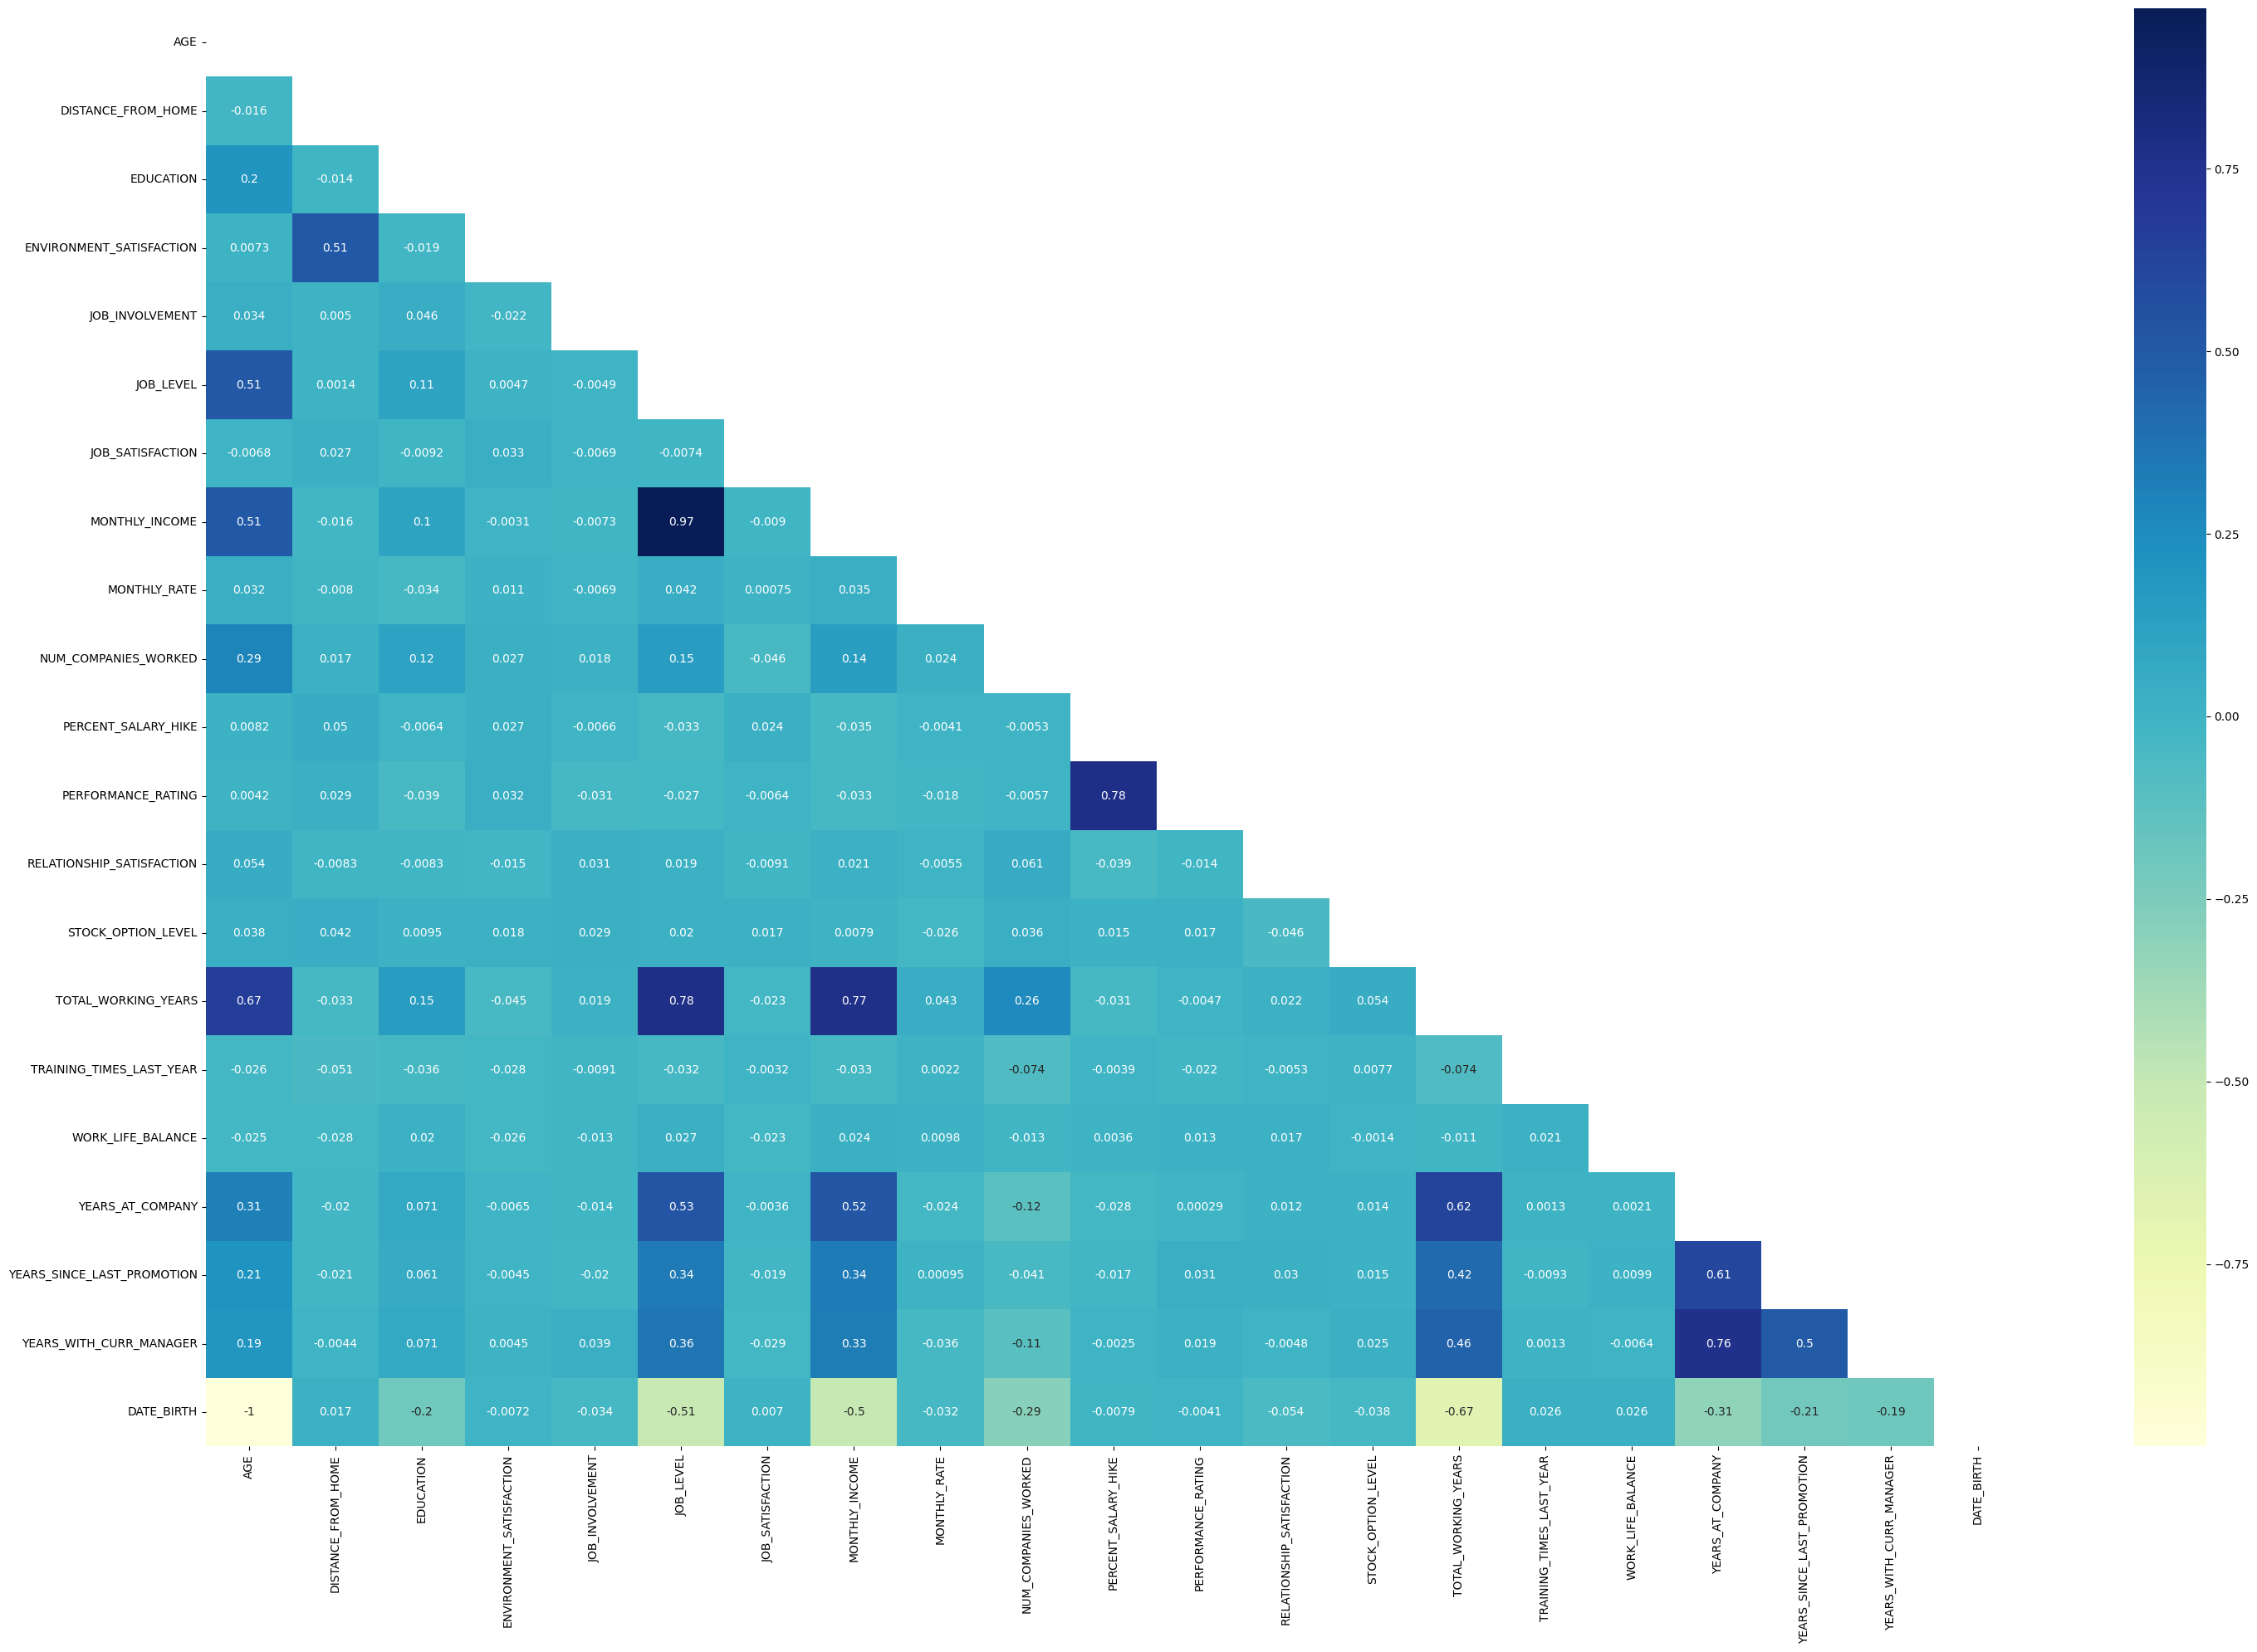

In [4]:
mapa_calor(df_completo, nombre_fichero="heatmap_limpio")

## Datos numéricos

### Comparación de medias y medianas
En el data frame que podemos ver un par de celdas más abajo, se pueden comparar los datos numéricos de los trabajores que dejaron la empresa con los de los que conxtinúan en ella:

* Los que abandonan son algo más jóvenes de media, unos 4 años.

* La DISTANCE_FROM_HOME es ligeramente superior entre los que abandonan y el ENVIRONMENT_SATISFACTION ligeramente inferior. En cambio el WORK_LIFE_BALANCE es prácticamente igual para ambos, así que no parece estar aquí la clave.

* Pero la diferencia más notable está en el salario mensual MONTHLY_INCOME, que es más elevado en los que se quedan y, como vimos anteriormente, está fuertemente correlacionado con JOB_LEVEL, que es el mínimo entre los que abandonan. En relación con esto merece la pena comentar que:

    * El STOCK_OPTION_LEVEL es inferior entre los que abandonan, nulo en una gran parte de los casos, siendo este uno de los complementos que afectarían al MONTHLY_INCOME.

    * YEARS_AT_COMPANY es dos años inferior entre los que abandonan. Parece que si aproximadamente a los cuatro años no ha habido un subida de categoría y por lo tanto de salario, se abandona la empresa.

In [5]:
df_felices_des = df_felices.describe().T
df_tristes_des = df_tristes.describe().T

df_felices_des['mean_tristes'] = df_tristes_des['mean']
df_felices_des['mean_felices'] = df_felices_des['mean']
df_felices_des['50%_tristes'] = df_tristes_des['50%']
df_felices_des['50%_felices'] = df_felices_des['50%']
df_tristes_felices = df_felices_des.drop(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], axis=1)

In [6]:
df_tristes_felices.head(21)

,mean_tristes,mean_felices,50%_tristes,50%_felices
AGE,33.820717,37.523773,32.0,36.0
DISTANCE_FROM_HOME,11.988048,11.193252,9.0,8.0
EDUCATION,2.844622,2.938650,3.0,3.0
ENVIRONMENT_SATISFACTION,3.438247,4.538344,3.0,3.0
JOB_INVOLVEMENT,2.521912,2.781442,3.0,3.0
JOB_LEVEL,1.649402,2.147239,1.0,2.0
JOB_SATISFACTION,2.470120,2.779908,3.0,3.0
MONTHLY_INCOME,4844.960159,6754.654908,2760.0,5304.0
MONTHLY_RATE,14356.549801,14221.843558,14255.0,14117.5
NUM_COMPANIES_WORKED,2.924303,2.641104,1.0,2.0


### Comparación de las distribuciones de datos numéricos entre los trabajadores que se van y los que se quedan

En las dos siguientes imágenes podemos constatar gráficamente lo que acabamos de comentar. Además, cabe comentar que:

* La DISTANCE_FROM_HOME parece superior entre los que abandonan.
* El MONTHLY_INCOME es superior entre los que se quedan

Saving figure hist_tristes


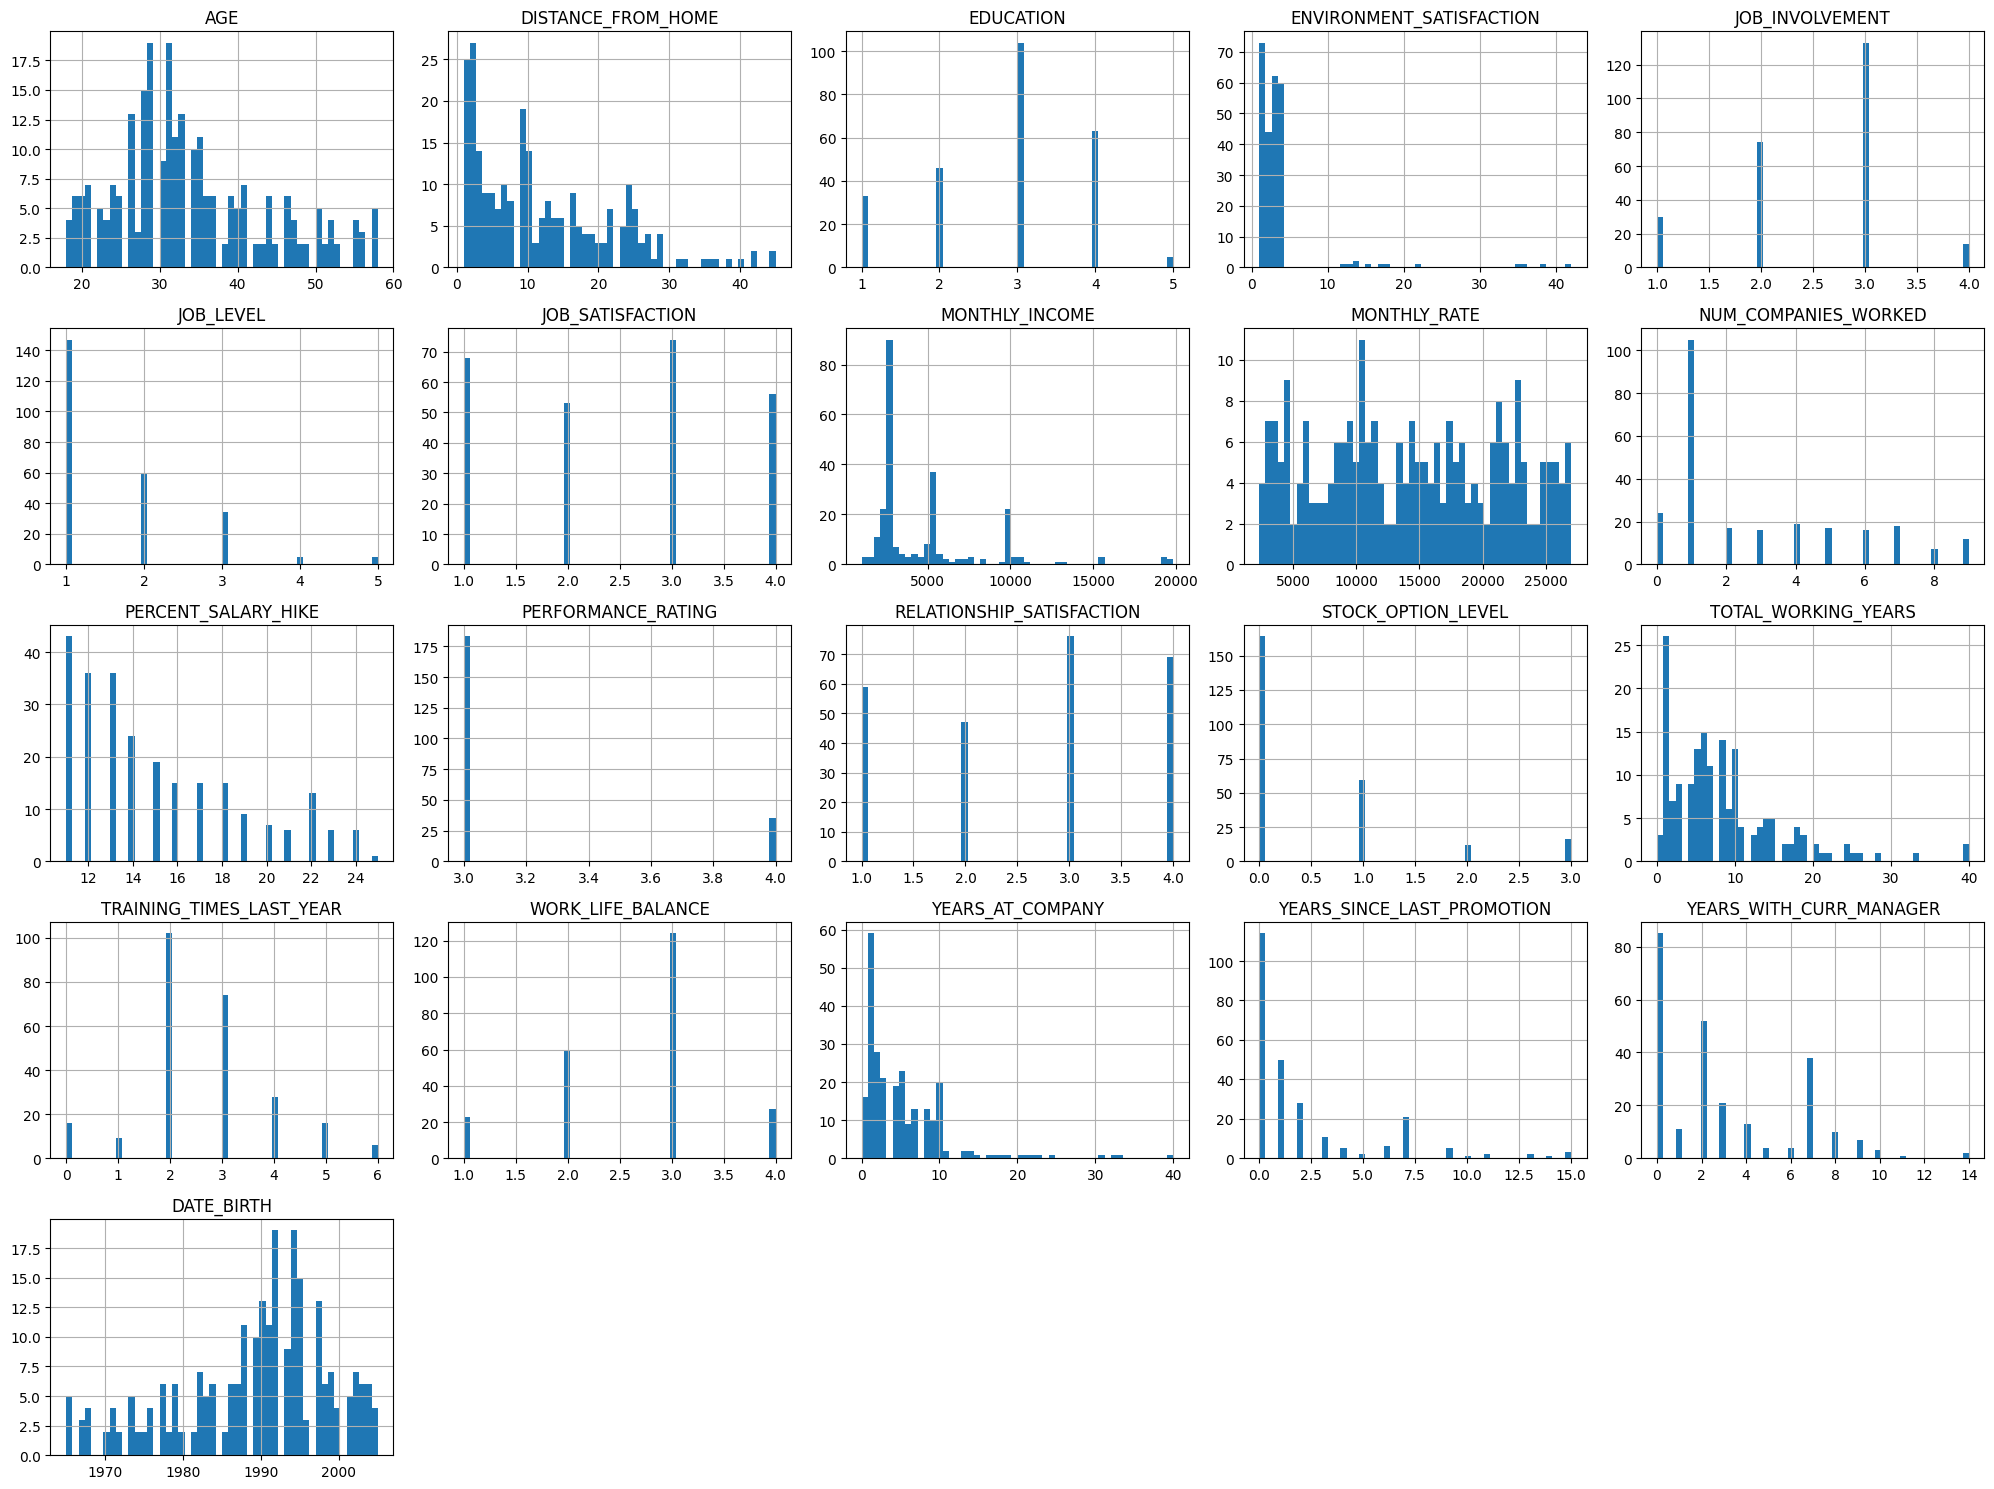

In [7]:
# Histograma para los dato numéricos de lod trabajadores que abandonan

histograma(df_tristes, nombre_fichero="hist_tristes")

Saving figure hist_felices


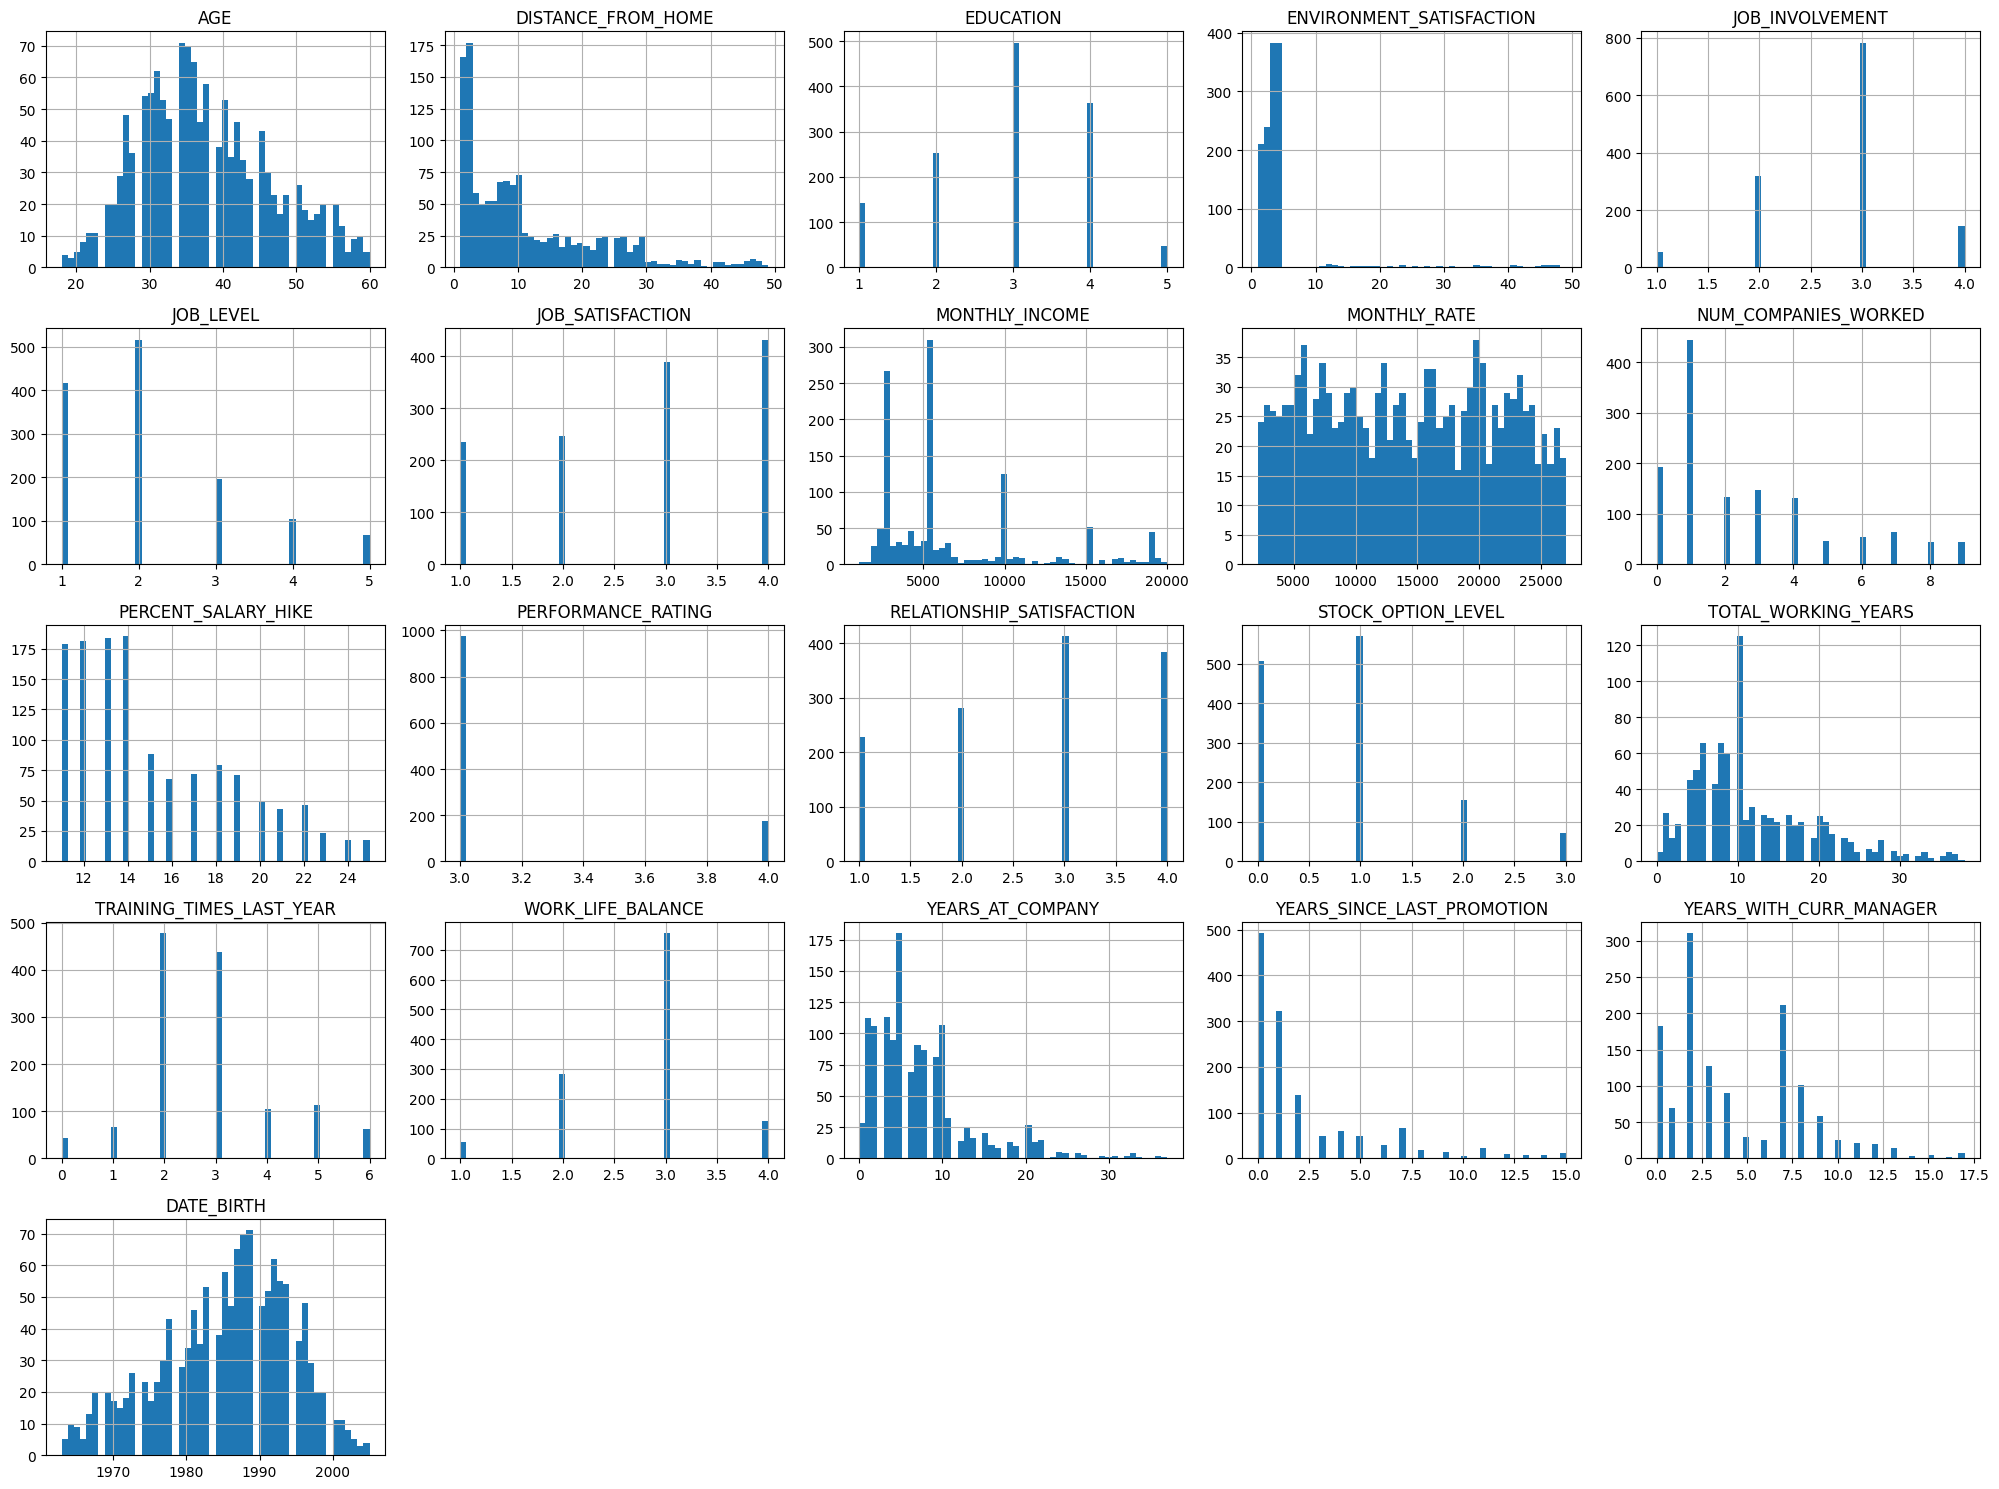

In [8]:
# Histograma para los dato numéricos de lod trabajadores que se quedan

histograma(df_felices, nombre_fichero="hist_felices")

### Comparación de los valores porcentuales de algunas columnas numéricas en relación a ATTRITION

Merece la pena analizar algunas de las columnas numérias con valores discretos desde un punto de vista categórico, observando su relación porcentual con ATTRITION.

Dado que ATTRITION tiene muchos más 'No' que 'Yes', para igualar las magnitudes y facilitar la visualización, se mostrará el porcentaje del conteo de cada columna en relación a la respuesta en ATTRITION.

* Parece que la mayor de las fugas se dan entre los más jóvenes, seguidos por los más mayores. Teniendo en cuenta la relación que tiene el dejar la empresa con los sueldos y la categoría laboral, parece que muchos de los empleados más jóvenes no ven buenas posibilidades de progresión laboral y los más mayores llegan a un techo sin más escalones.

/home/bluetab/Documents/pyprojects/Empleados/empleados_package/visualizacion.py:179: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


Saving figure hist_por_attAge


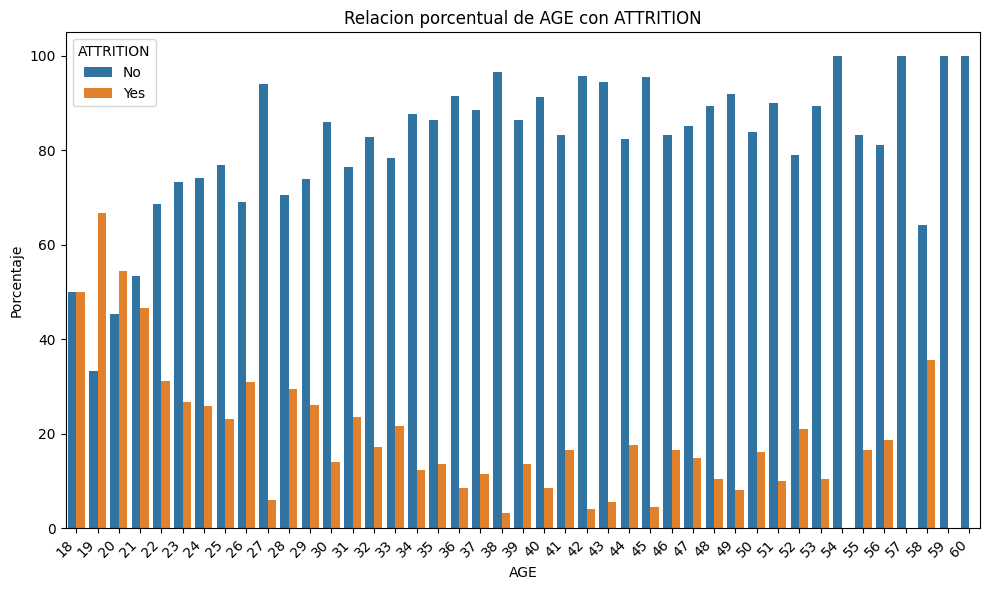

In [9]:
# Edad
histo_porcentual(df_completo, 'AGE', 'ATTRITION', 'hist_por_attAge')

* Los que se marchan son los que menos y los que más STOCK_OPTION_LEVEL tienen. Esto encaja con os dicho anteriormente respecto a la edad. Los más jóvenes y los más mayores son los que tendrá este valor más alto y más bajo.

Saving figure hist_por_attStock


/home/bluetab/Documents/pyprojects/Empleados/empleados_package/visualizacion.py:179: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


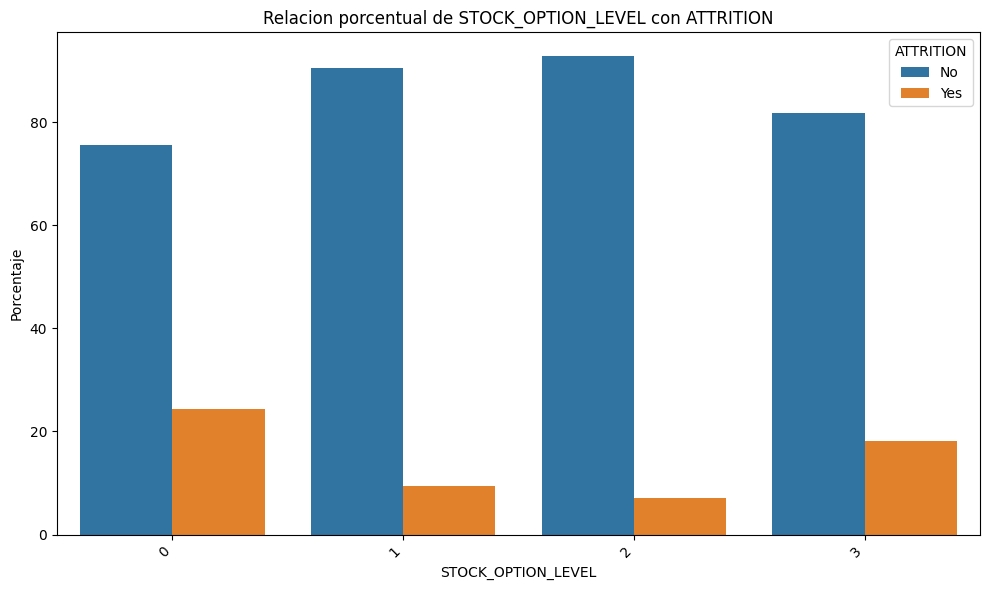

In [10]:
# Opciones sobre acciones

histo_porcentual(df_completo, 'STOCK_OPTION_LEVEL', 'ATTRITION', 'hist_por_attStock')

* La conciliación familiar (WORK_LIFE_BALANCE) tiene menor nota entre los que abandonan.

/home/bluetab/Documents/pyprojects/Empleados/empleados_package/visualizacion.py:179: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


Saving figure hist_por_attBal


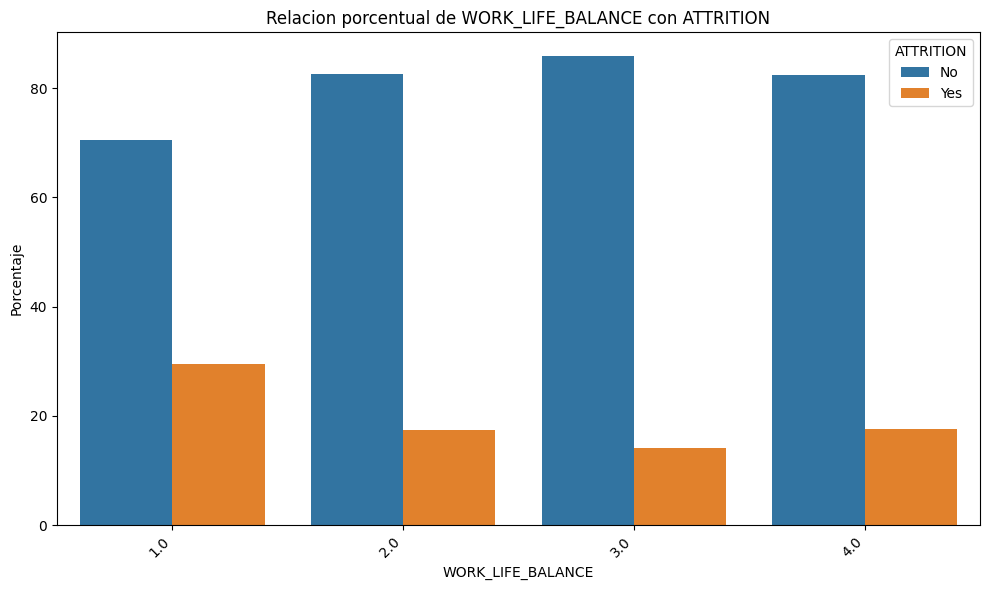

In [11]:
# Conciliación familiar

histo_porcentual(df_completo, 'WORK_LIFE_BALANCE', 'ATTRITION', 'hist_por_attBal')

## Comparación de columnas categóricas

### Comparación de los valores absolutos de las columnas categóricas en relación a ATTRITION

En las dos siguientees imágenes tenemos la distribución de las variables categóricas entre los que abandonan y los que siguen. Hay un par de cosas que merece la pena comentar:

* En OVER_TIME:

    * Entre los que abandonan los síes y nóes están igualados.
    * Entre los que se quedan los nóes son mucho más que los síes.

    Parece que una respuesta positiva en OVER_TIME sí es un factor relevante, si bien no definitiva a la hora de dejar la empresa. En todo caso lo comprobaremos viendo sus valores porcentuales.

Hay que aclarar que en otras columnas como EDUCATION_FIELD y JOB_ROLE las conclusiones no pueden ser definitivas. Habría que ver los valores porcentuales, pues, por ejemplo, puede que los puestos de más responsabilidad sean los que tienen más abandono, pero al haber menos individuos en ellos no lo veremos reflejado aquí. Lo mismo ocurre con los estudios, aquí vemos los perfiles más contratados, pero puede que porcentualmente la cosa cambie. Analizaremos esto más abajo.

Saving figure cat_tristes


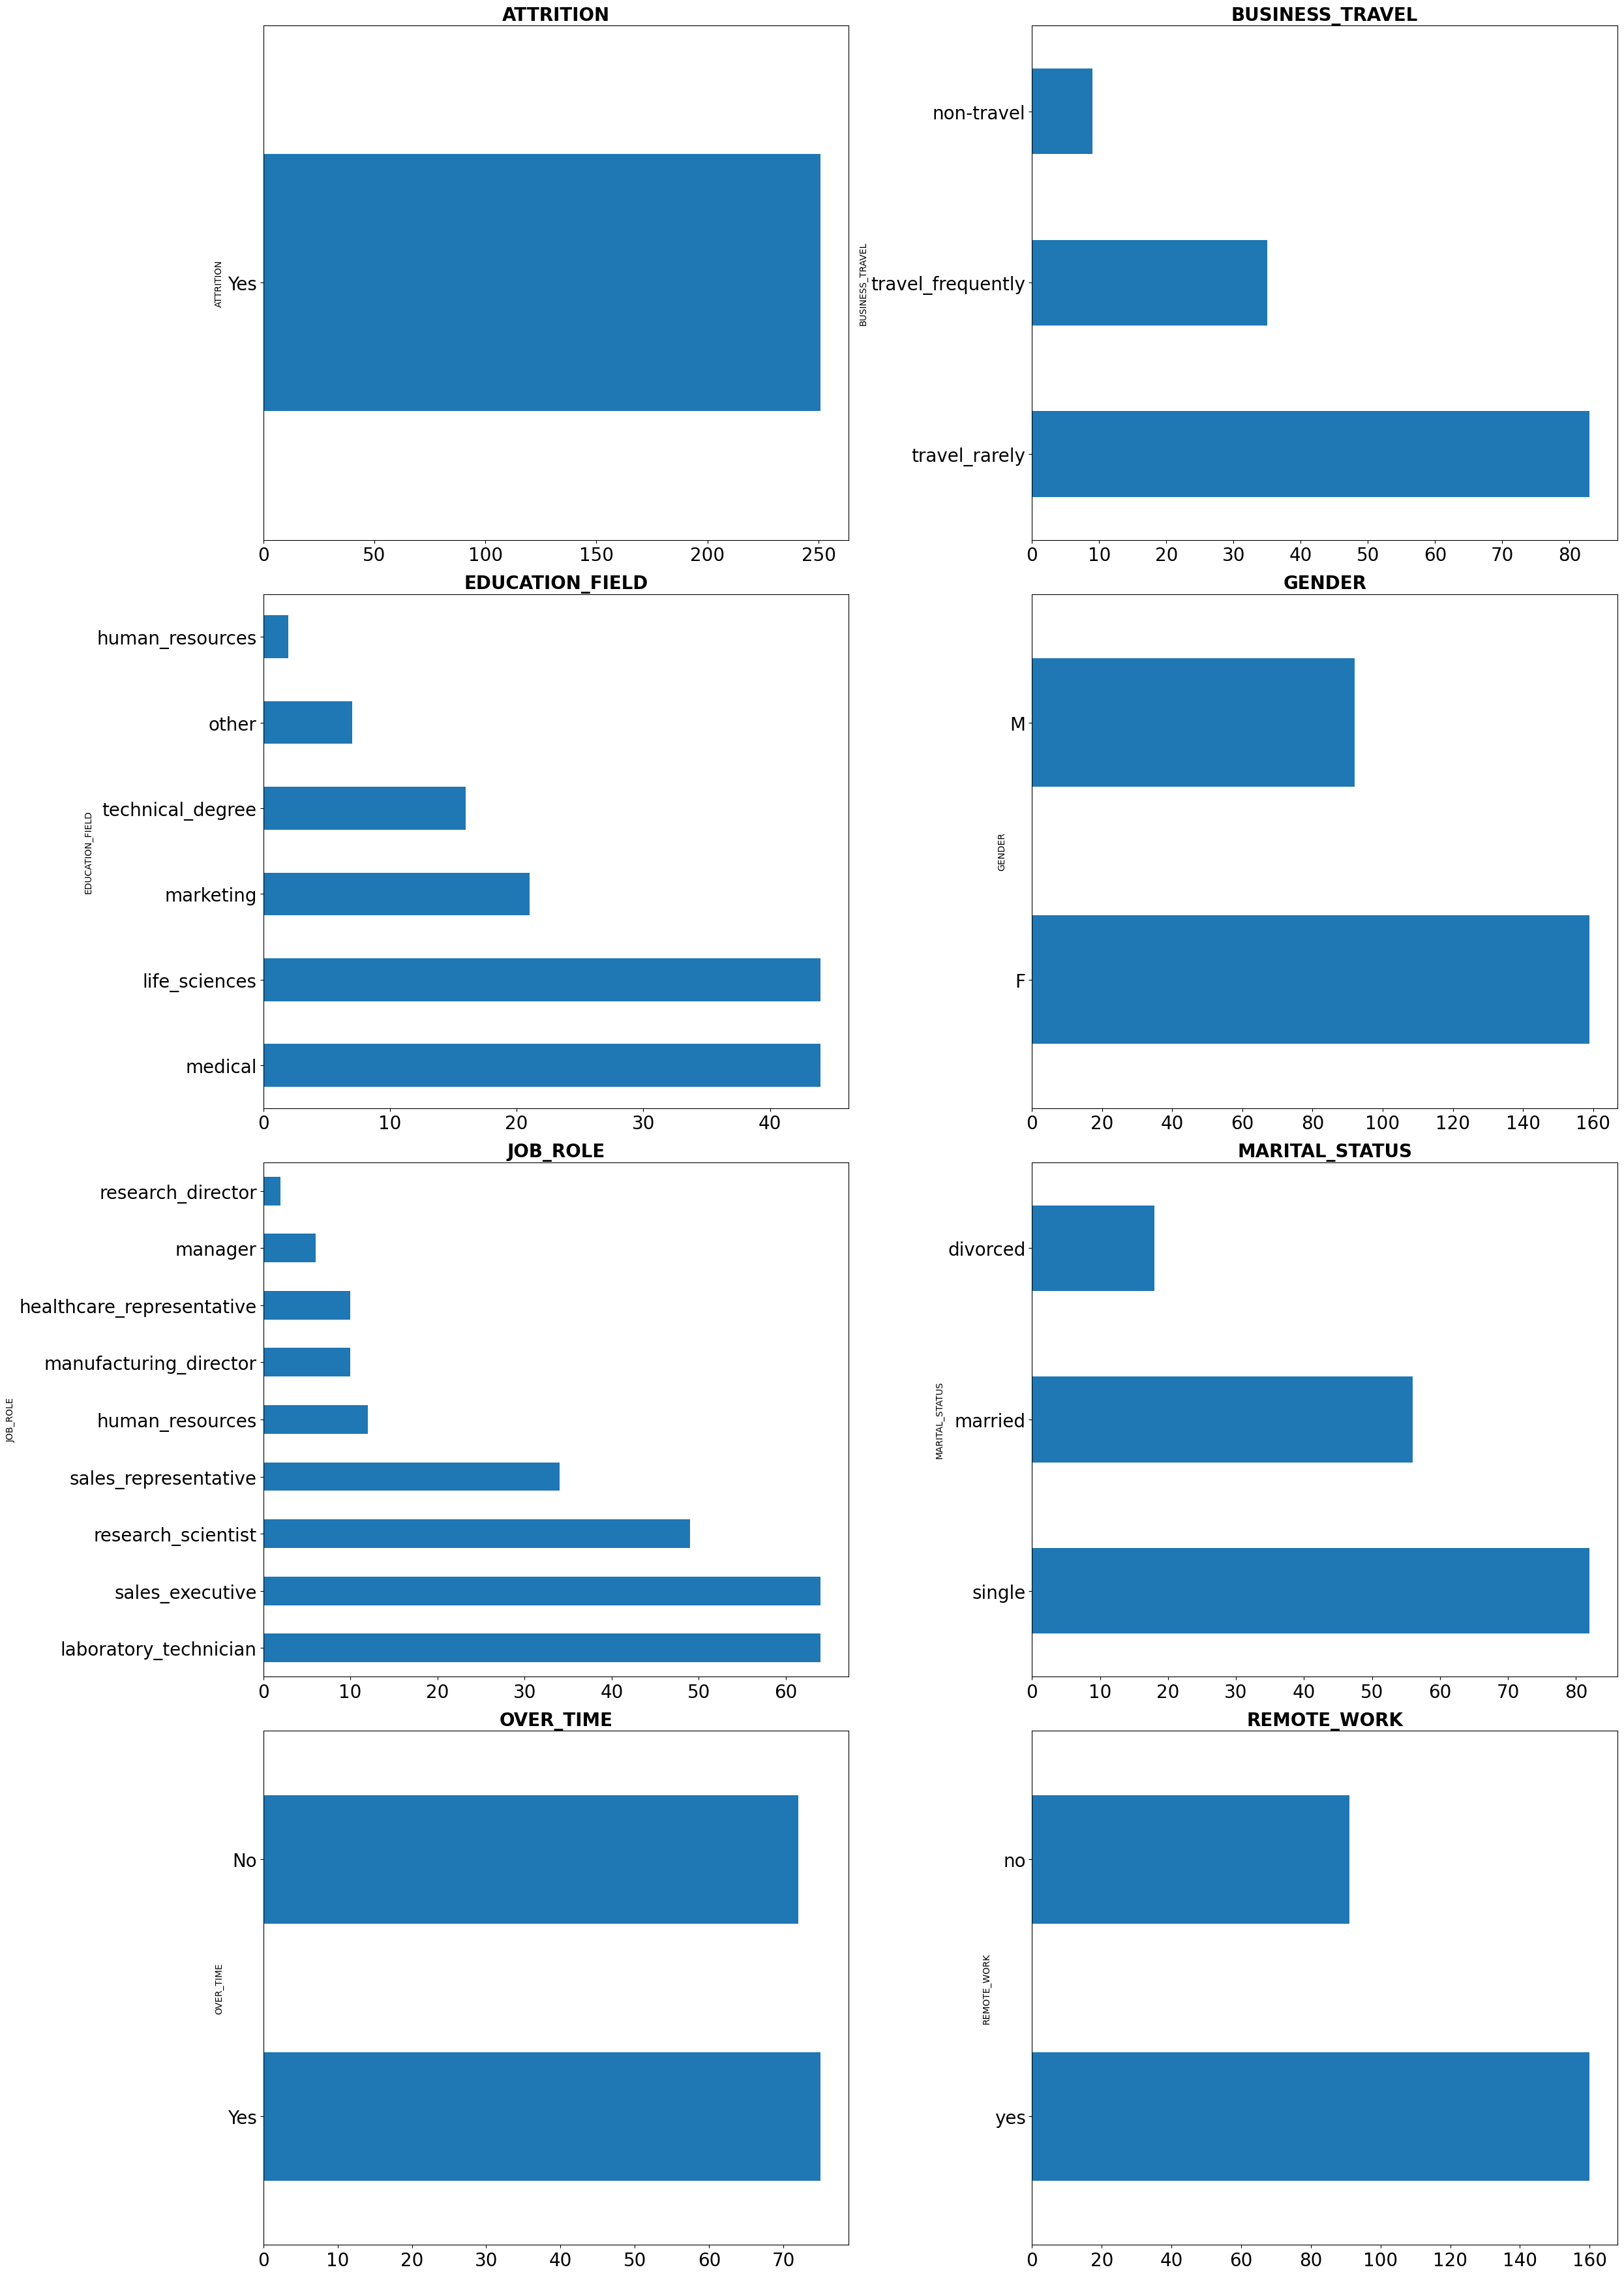

In [12]:
categoricos(4, 2, df_tristes, nombre_fichero="cat_tristes")

Saving figure cat_felices


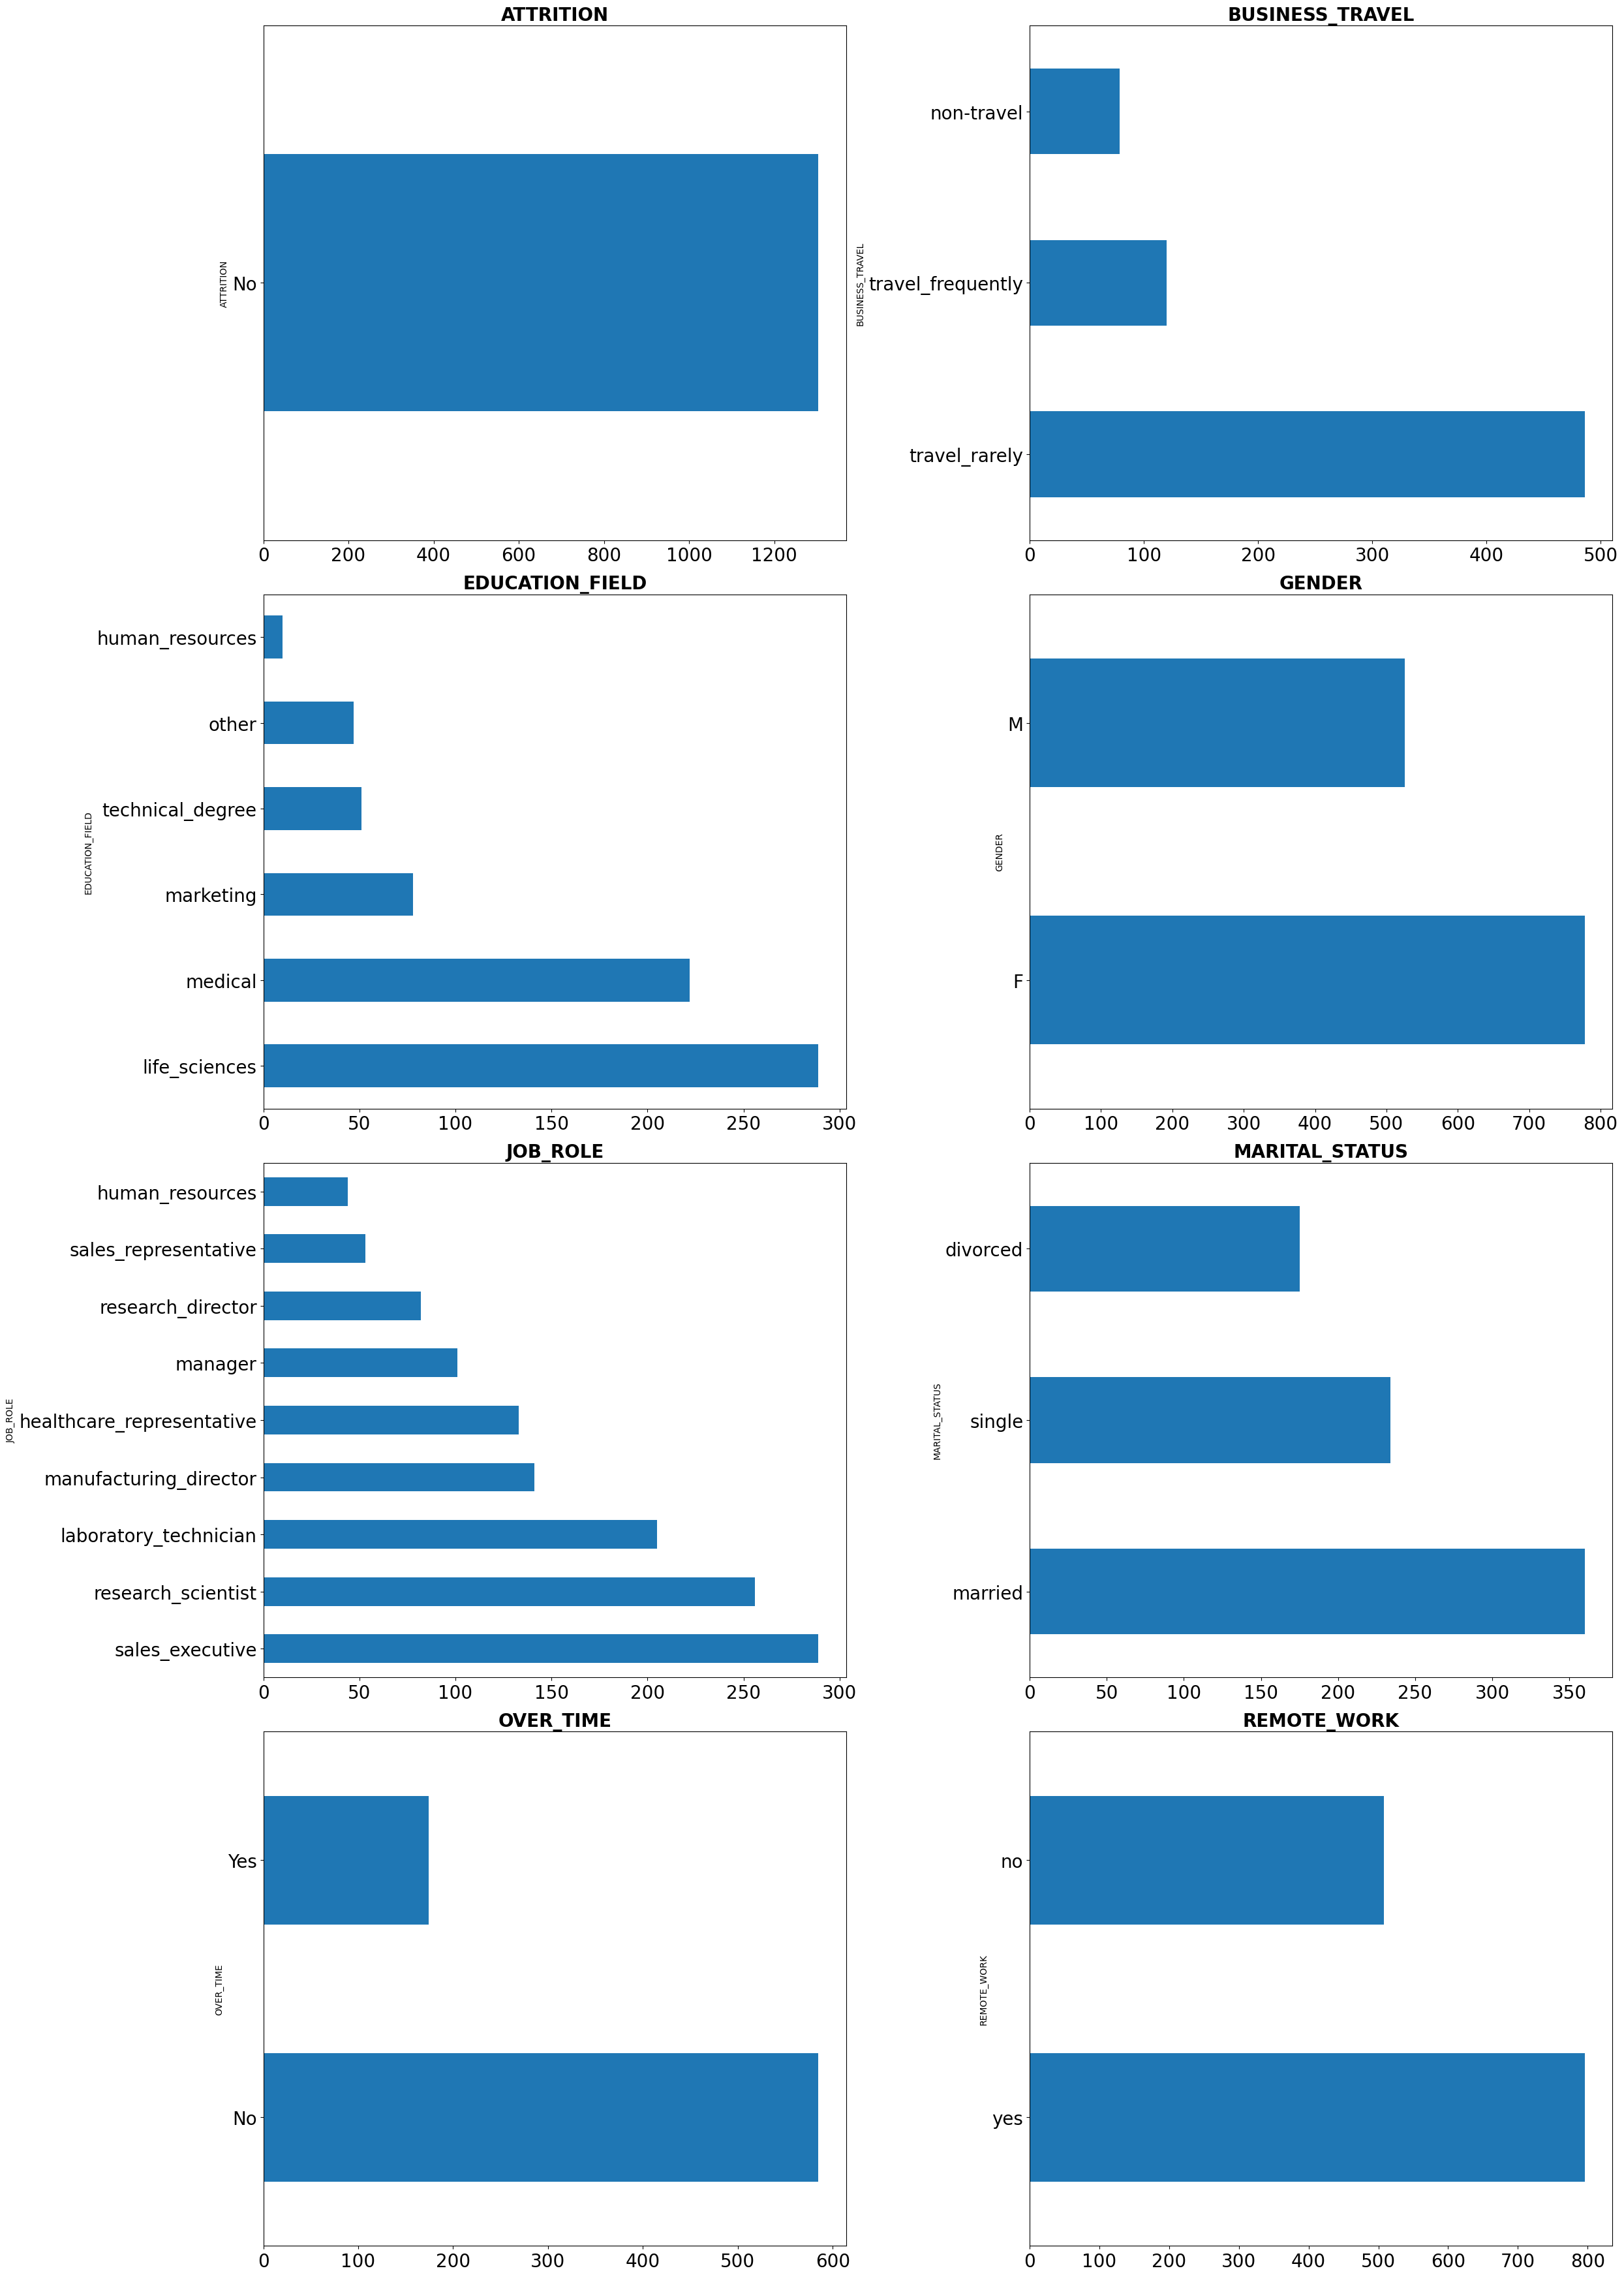

In [13]:
categoricos(4, 2, df_felices, nombre_fichero="cat_felices")

### Comparación de los valores porcentuales de columnas categóricas en relación a ATTRITION

Una comparación de las columnas categóricas en relación porcentual con ATTRITION arrojará luz sobre las posibles causas de abandono de la empresa:

* Sin que BUSINESS_TRAVEL tenga un impacto demasiado fuerte, parece que los que viajan con frecuencia tienen más tendencia a abandonar la empresa.

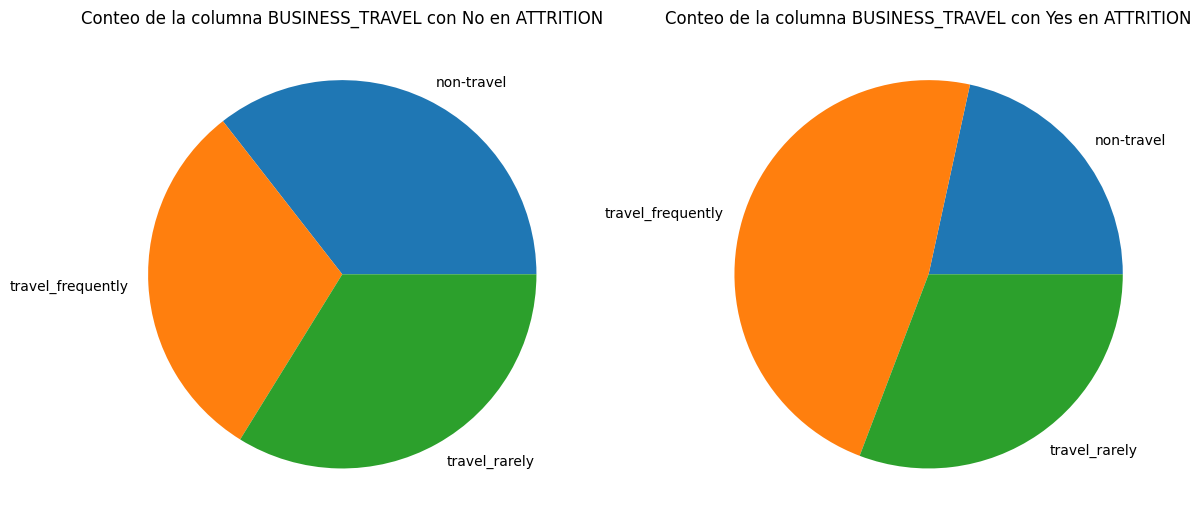

In [14]:
quesitos_porcentual(df_completo, 'BUSINESS_TRAVEL', 'ATTRITION')

* Curiosamente parece que los solteros tienen más tendencia a abandonar la empresa y los divorciado a quedarse, según podemos ver en MARITAL_STATUS.

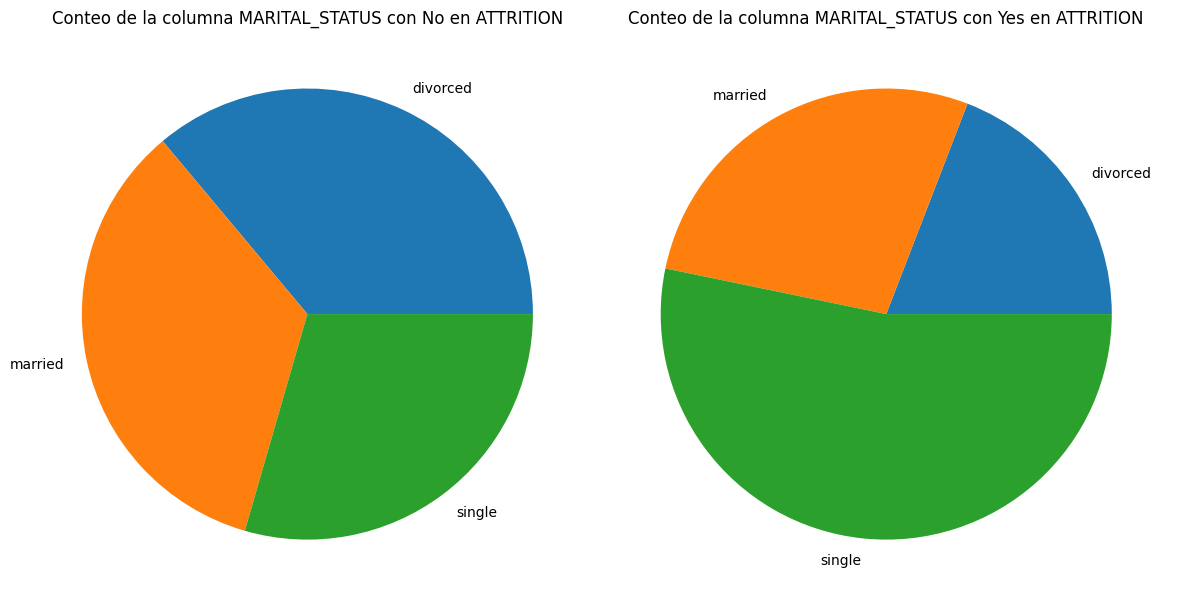

In [15]:
quesitos_porcentual(df_completo, 'MARITAL_STATUS', 'ATTRITION')

* En cuanto al sexo, hay un poco más de mujeres que abandonan las empresa, pero no parece en absoluto una tendencia reseñable.

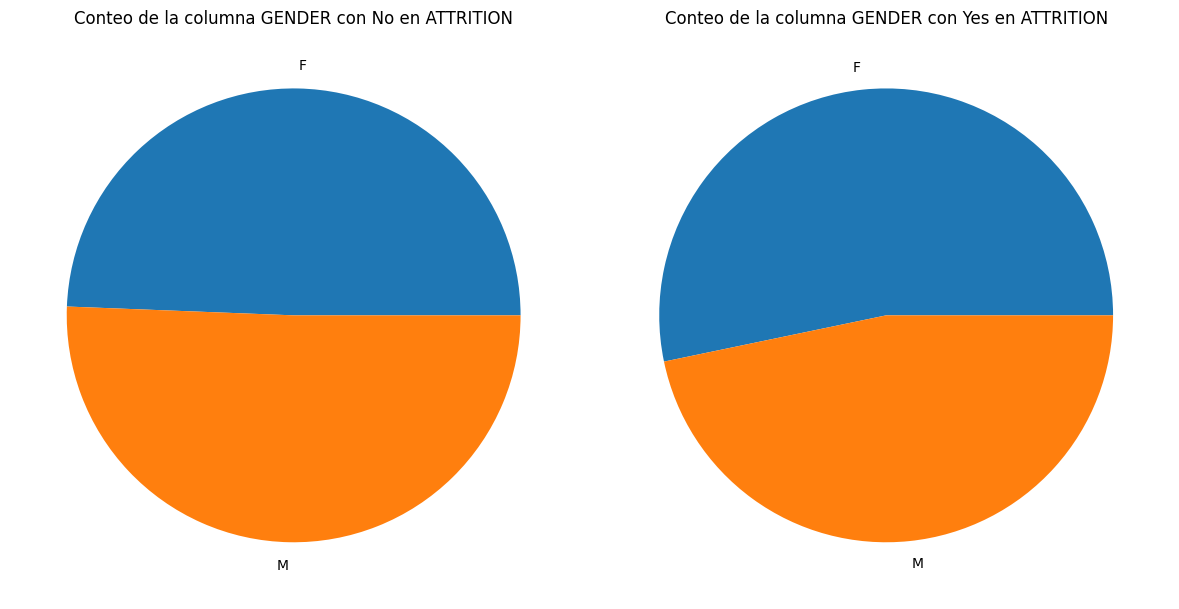

In [16]:
quesitos_porcentual(df_completo, 'GENDER', 'ATTRITION')

In [17]:
valores = df_completo['ATTRITION'].unique().tolist()

In [18]:
valores[0]

'No'

* Como ya se había apuntado arriba, entre los que abandonan la empresa hay más que responden positivamente a OVER_TIME que entre los que se quedan.

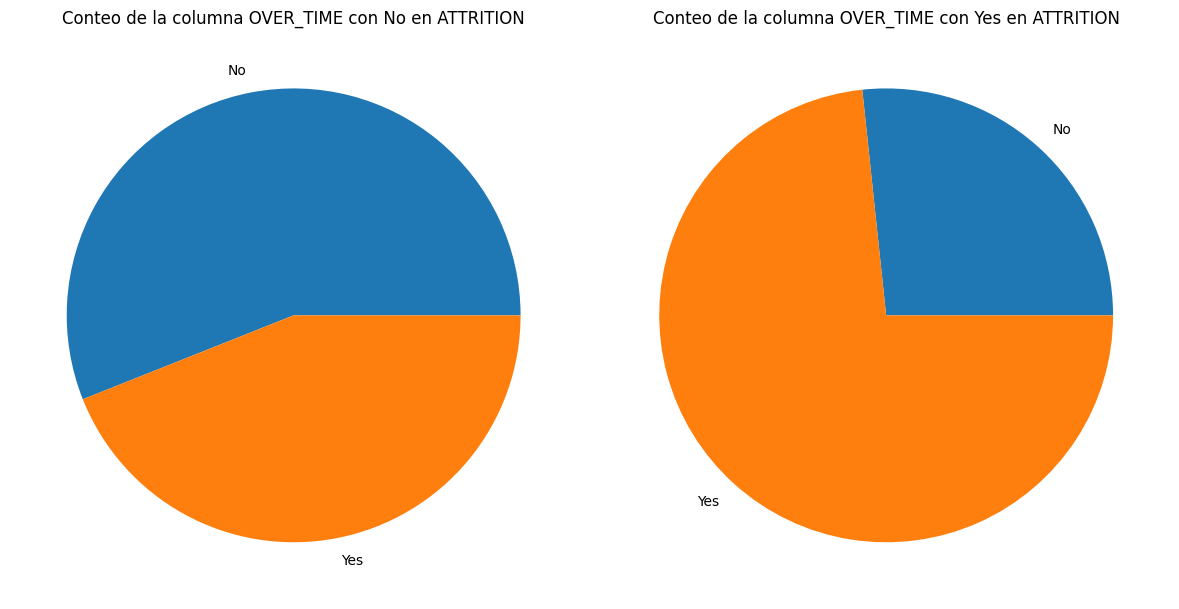

In [19]:
quesitos_porcentual(df_completo, 'OVER_TIME', 'ATTRITION')

* En cuanto a EDUCATION_FIELD, aunque tampoco parece determinante, lo cierto es que los campos technical_degree y marketin son los que presentan mayor abandono y menor permanencia.

/home/bluetab/Documents/pyprojects/Empleados/empleados_package/visualizacion.py:179: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


Saving figure hist_por_attEdu


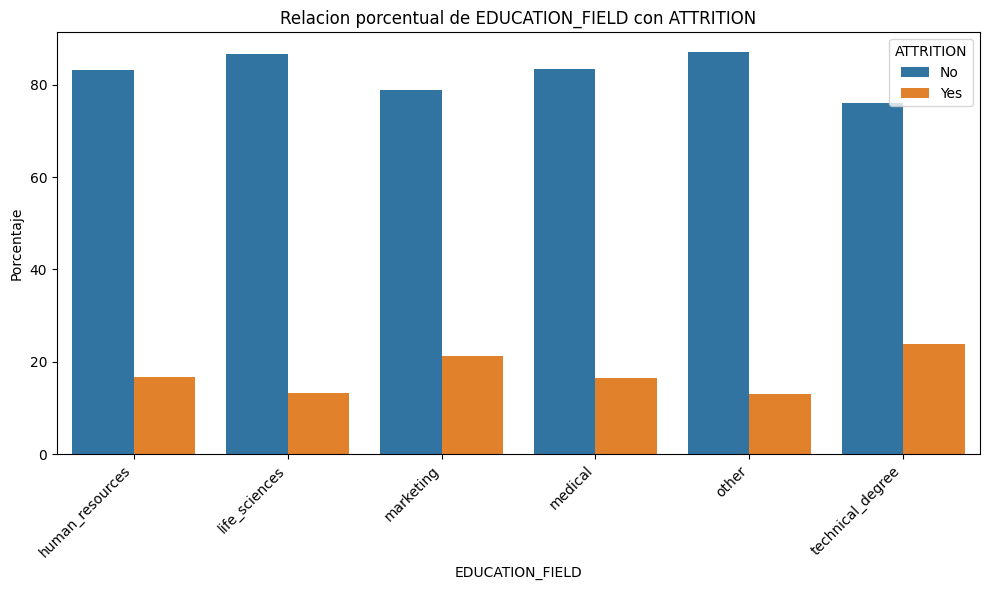

In [20]:
histo_porcentual(df_completo, 'EDUCATION_FIELD', 'ATTRITION', 'hist_por_attEdu')

* En JOB_ROLE sí que hay un claro ganador, sales_representative es quien presenta mayor índice de abandono, seguido de laboratory_technician.

Saving figure hist_por_attRole


/home/bluetab/Documents/pyprojects/Empleados/empleados_package/visualizacion.py:179: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


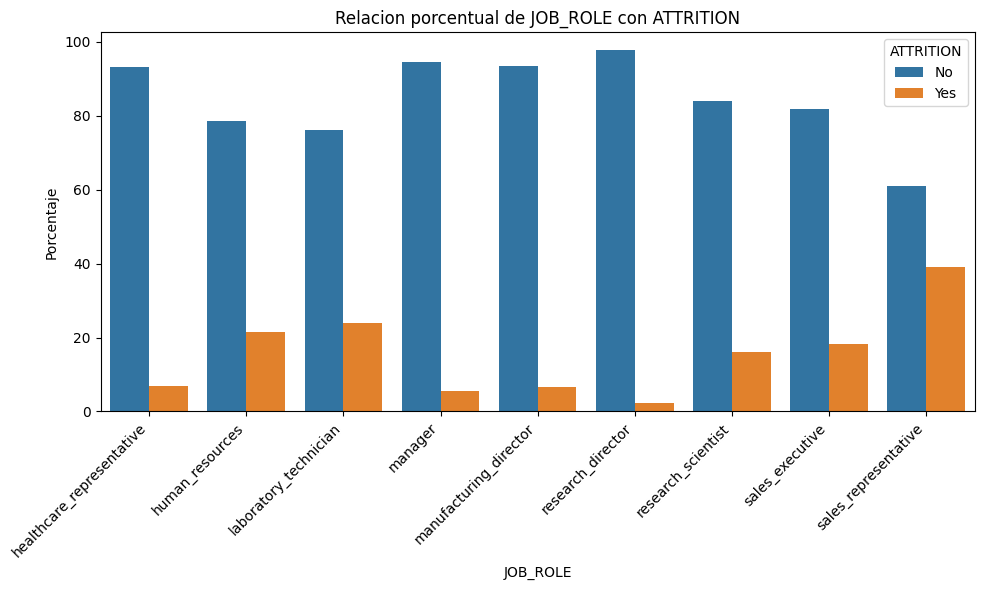

In [21]:
histo_porcentual(df_completo, 'JOB_ROLE', 'ATTRITION', 'hist_por_attRole')

# Conclusiones

En este punto ya estamos preparados para sacar algunas conclusiones de los datos y aportar al departamente de recursos humanos información útil que ayude a mitigar la fuga de talento de la empresa.

El factor más relevante parece ser el **sueldo percibido** (MONTHLY_INCOME), pero merece la pena matizarlo:

* Hay un estrecha relación entre el salario percibido y la categoría profesional (JOB_LEVEL) y si bien el dinero es el factor determinante a la hora de elegir un trabajo, no hay que obviar el impacto que puede tener en la autoestima el reconocimiento de la valía, de hecho el JOB_LEVEL entre los que abandonan es el más bajo.

    * El número de años en la empresa (YEARS_AT_COMPANY) es, de media, dos años inferior entre los que abandonan, estando en 4 para los que se van y 6 para los que se quedan. Siguiendo el razonamiento, si a los cuatro años el trabajador con la categoría profesional más baja no ha obtenido una subida  de categoría con la consecuente subida salarial, abandona la empresa.

    * Respecto a la edad, parece que los 19 años es la que presenta más bajas, tendencia que va bajando hacia los 40 y vuelve a remontar sin llegar a los niveles del pricipio. Esto puede estar relacionado con la falta de perspectivas de crecimiento al comienzo y al final de la vida laboral.

    * El STOCK_OPTION_LEVEL entre los que abandonan parece seguir un patrón similar al de la edad. Siendo este uno de los complementos que afectarían al MONTHLY_INCOME, se reafirma la idea de que la ausencia de perspectivas de aumento al principio y al final de la carrera la laboral es una de las causas principales de fuga de talentos.

    * Parece que la valoración de desenpeño (PERFORMANCE_RATING) es el factor principal para las subidas salariales (PERCENT_SALARY_HIKE). Visto lo visto, es aquí donde habría que poner el acento para incitar a los trabajadores a quedarse.

Además de estos factores más o menos relacionados con el salario percibido, hay otros que pueden darnos pistas acerca de las causas de abandono. Aunque no tengan tanto peso tomados uno a uno, en conjunto nos ayuda a entender el problema:

* La DISTANCE_FROM_HOME es ligeramente superior entre los que abandonan, que ademaś dan una menor calificación a ENVIRONMENT_SATISFACTION ligeramente inferior.

* La mayor porque de las fugas se dan entre los más jóvenes, seguidos por los más mayores. 

* Los que abandonan tienen más repuestas positivas a OVER_TIME, de modo que jornadas laborales excesivamente largas también parecen ser un factor que llevan al abandono

* Sin que BUSINESS_TRAVEL tenga un impacto demasiado fuerte, parece que los que viajan con frecuencia tienen más tendencia a abandonar la empresa.

* Los campos technical_degree y marketin son los que presentan mayor abandono y menor permanencia.

* Entre los puestos, sales_representative es quien presenta mayor índice de abandono, seguido de laboratory_technician.